In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

1.Load Data

In [ ]:
sales = pd.read_csv("Sample - Superstore.csv", encoding="latin1")

Convert dates

In [ ]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], errors='coerce')
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], errors='coerce')

Create Year and Month columns

In [ ]:
sales['Year'] = sales['Order Date'].dt.year
sales['Month_Num'] = sales['Order Date'].dt.month
sales['Month'] = sales['Order Date'].dt.month_name()

2.Prepare Aggregated Data

In [ ]:
# Monthly Sales
monthly_sales = sales.groupby(['Year','Month_Num','Month'])['Sales'].sum().reset_index()

In [ ]:
# Top 10 Products by Sales
top_products = sales.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

In [ ]:
# Profit by Category
category_profit = sales.groupby('Category')['Profit'].sum().reset_index()

In [ ]:
# Sales by Region
region_sales = sales.groupby('Region')['Sales'].sum().reset_index()

3.Create Combined 2x2 Subplots

In [ ]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Monthly Sales Trend", "Top 10 Products by Sales", "Profit by Category", "Sales by Region"),
    specs=[[{"type": "scatter"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "pie"}]]
)

# Color palette
colors = ['#636EFA','#EF553B','#00CC96','#AB63FA','#FFA15A']

In [ ]:
# --- Monthly Sales Trend (Line) ---

for i, year in enumerate(sorted(monthly_sales['Year'].unique())):
    df_year = monthly_sales[monthly_sales['Year']==year]
    # Slight x-offset to reduce overlap
    fig.add_trace(go.Scatter(
        x=df_year['Month_Num'] + (i*0.05),
        y=df_year['Sales'],
        mode='lines+markers',
        name=str(year),
        line=dict(color=colors[i % len(colors)])
    ), row=1, col=1)

fig.update_xaxes(
    tickmode="array",
    tickvals=list(range(1,13)),
    ticktext=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    row=1, col=1
)

In [ ]:
# --- Top 10 Products (Horizontal Bar) ---

fig.add_trace(go.Bar(
    x=top_products['Sales'],
    y=top_products['Product Name'],
    orientation='h',
    name='Top Products',
    marker_color='#EF553B'
), row=1, col=2)

In [ ]:
# --- Profit by Category (Bar) ---

fig.add_trace(go.Bar(
    x=category_profit['Category'],
    y=category_profit['Profit'],
    name='Category Profit',
    marker_color=colors[:len(category_profit)]
), row=2, col=1)

In [ ]:
# --- Sales by Region (Pie) ---
fig.add_trace(go.Pie(
    labels=region_sales['Region'],
    values=region_sales['Sales'],
    hole=0.3,
    marker_colors=colors[:len(region_sales)]
), row=2, col=2)

4️.Layout & Display

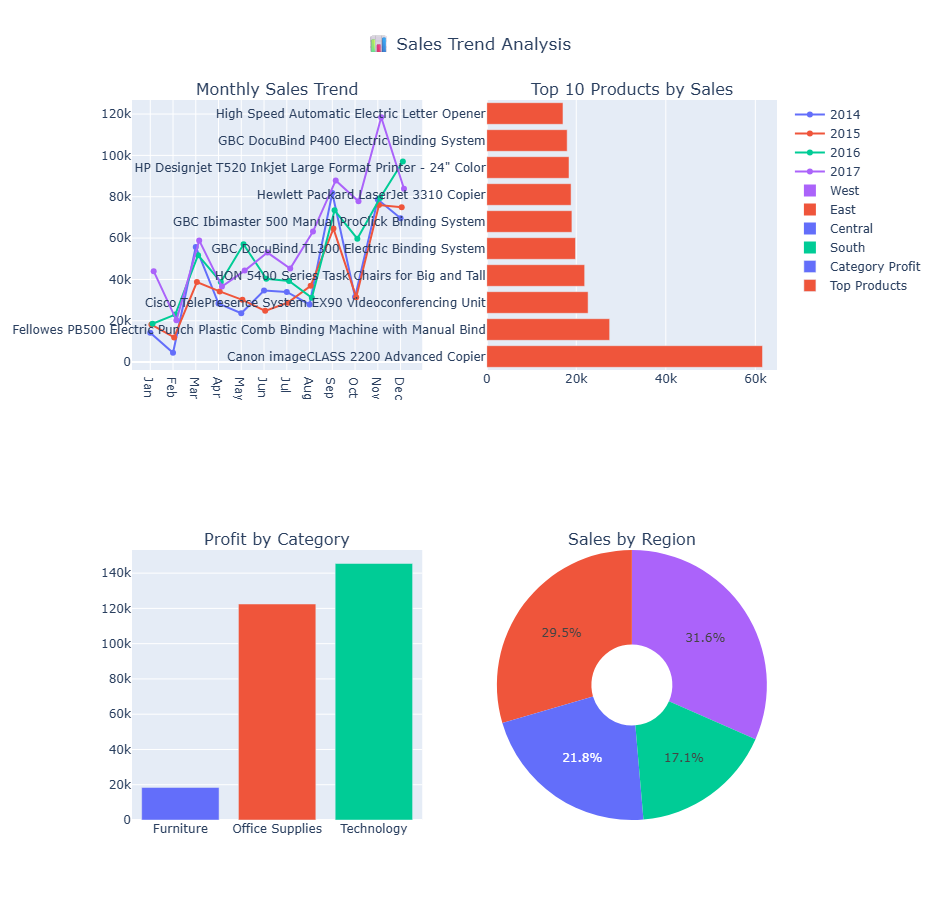

In [15]:
fig.update_layout(
    height=900,
    width=1100,
    title_text="📊 Sales Trend Analysis",
    showlegend=True,
    title_x=0.5
)

fig.show()

INSIGHTS FROM THE ABOVE ANALYSIS

📈 Monthly Sales Trend Insights:
- Highest yearly sales were in 2017 with total sales of $733,215.
- Sales show a peak in November–December, indicating strong holiday demand.

🏆 Top 10 Products Insights:
- The highest-selling product is 'Canon imageCLASS 2200 Advanced Copier' with total sales of $61,600.
- A small number of products contribute disproportionately to overall revenue.

💰 Profit by Category Insights:
- The most profitable category is Technology with $145,455 profit.
- The least profitable category is Furniture with $18,451 profit (may even include losses).
- Furniture generates high sales but struggles with profitability.

🌍 Sales by Region Insights:
- The strongest region is West with sales of $725,458.
- The weakest region is South with sales of $391,722.
- Central region lags behind, indicating room for growth.

🚀 Overall Recommendations:
- Focus on profitable categories (Technology & Office Supplies).
- Re-evaluate discount & shipping policies for Furniture.
- Plan marketing campaigns in weaker regions like Central.
- Stock up for holiday season promotions, as sales peak at year-end.